In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Problem: Predicting Usage of a Video Game Research Server


This year we have a unique opportunity: we have a real data science project with real stakeholders who are looking for answers to a few questions about their data.

In particular, a research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a MineCraft serverLinks to an external site., and players' actions are recorded as they navigate through the world. But running this project is not simple: they need to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract. There are three broad questions of interest. 

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Question 3: We are interested in demand forecasting, namely, what time windows are most likely to have large number of simultaneous players. This is because we need to ensure that the number of licenses on hand is sufficiently large to accommodate all parallel players with high probability. 

In [5]:
players <- read_csv("VideoGamePrediction/Data/players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Provide a full descriptive summary of the dataset, including information such as the number of observations, summary statistics, number of variables, name and type of variables, what the variables mean, any issues you see in the data, any other potential issues related to things you cannot directly see, how the data were collected, etc. Make sure to use bullet point lists or tables to summarize the variables in an easy-to-understand format.

Note that the selected dataset(s) will probably contain more variables than you need. In fact, exploring how the different variables in the dataset affect your model may be a crucial part of the project. You need to summarize the full data regardless of which variables you may choose to use later on.

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

In [8]:
dim(players)

[1] 196   7

The players recruited into this game are 196 in number, with their information collected on 7 items. They have experience that make them to be any of `Pro`, `Veteran`, `Amateur`, `Regular` or `Beginner`. The players when asked either they subscribe or not, the responses are either `TRUE` or `FALSE`. Meanwhile each of them has a distinct `hashedEmail`. When there is a record of no playing hours for some, the average playing hours (`played_hours`) is about 5.8 hours and some could play for as long as about 223.1 hours. The data is tidy as each row corresponds to the player name.

In [9]:
# Different type of experience they have
unique(players$experience)

[1] "Pro"      "Veteran"  "Amateur"  "Regular"  "Beginner"

In [12]:
# Response about if they subscribe or not
unique(players$subscribe)

[1]  TRUE FALSE

In [15]:
# Average playing hour
mean(players$played_hours)

# Minimum playing hour
min(players$played_hours)

#Maximum playing hour
max(players$played_hours)

[1] 5.845918

[1] 0

[1] 223.1

In [27]:
# Unique name for the players
#tibble(unique(players$name))

In [30]:
# Average age of the player
mean(players$Age, na.rm = TRUE)

# Minimum age of the player
min(players$Age, na.rm = TRUE)

[1] 20.52062

[1] 8

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


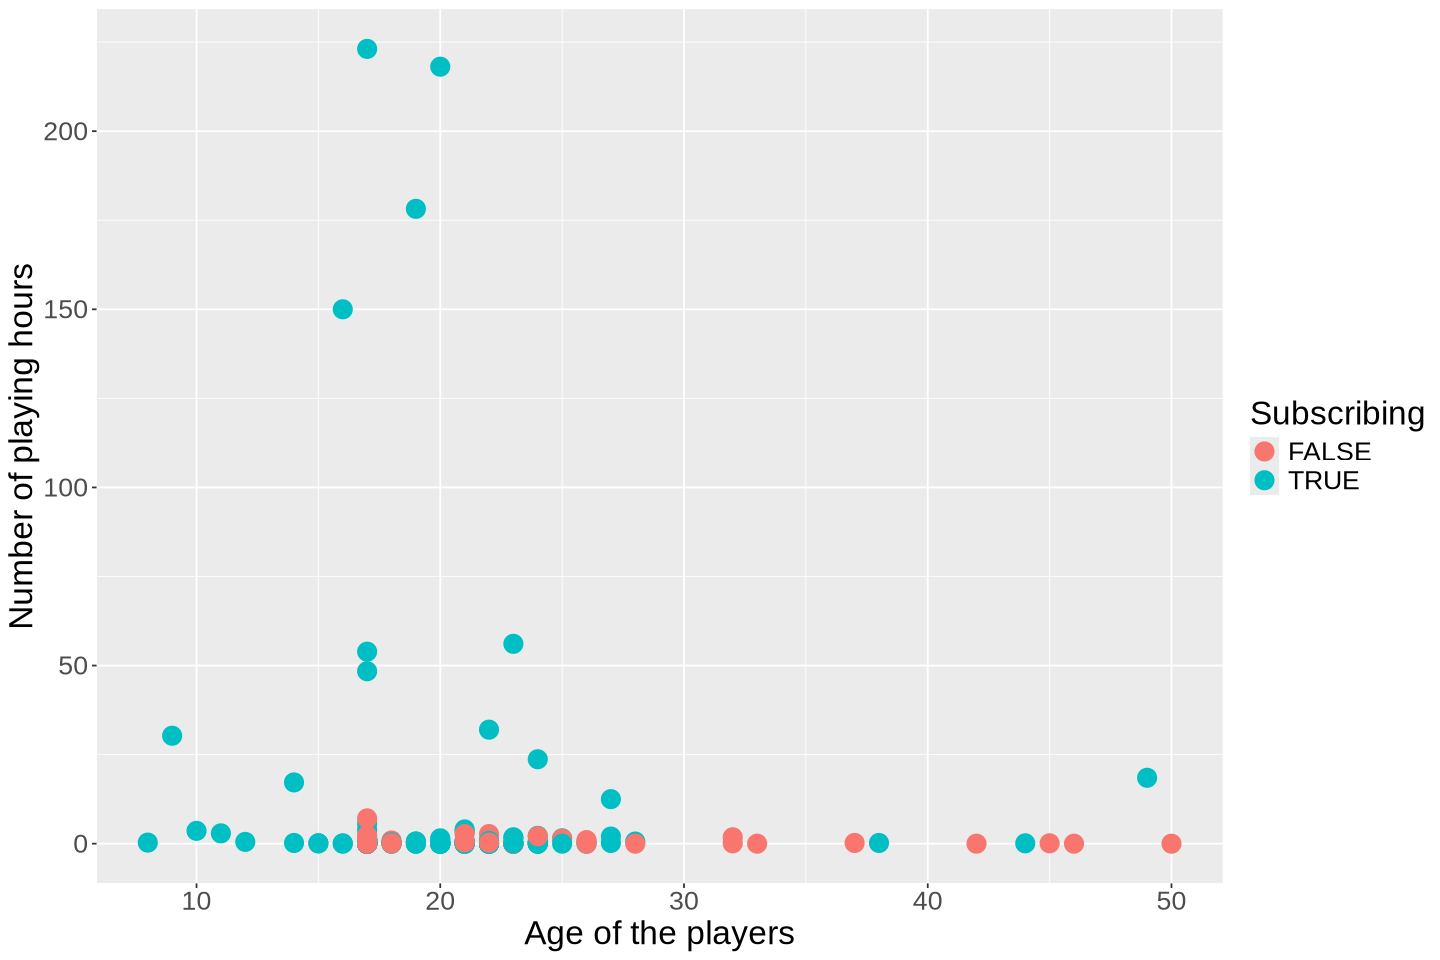

In [54]:
options(repr.plot.height = 8, repr.plot.width = 12)
players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point(size = 5) +
    labs(x = "Age of the players",
        y = "Number of playing hours",
        color = "Subscribing") +
    theme(text = element_text(size = 20))
    

Although, there is weak to no obvious linear relationship between the Age and playing time however, it is reasonable to infer that irrespective of the age of those who do not subscribe, the played hours remain at minimal level.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


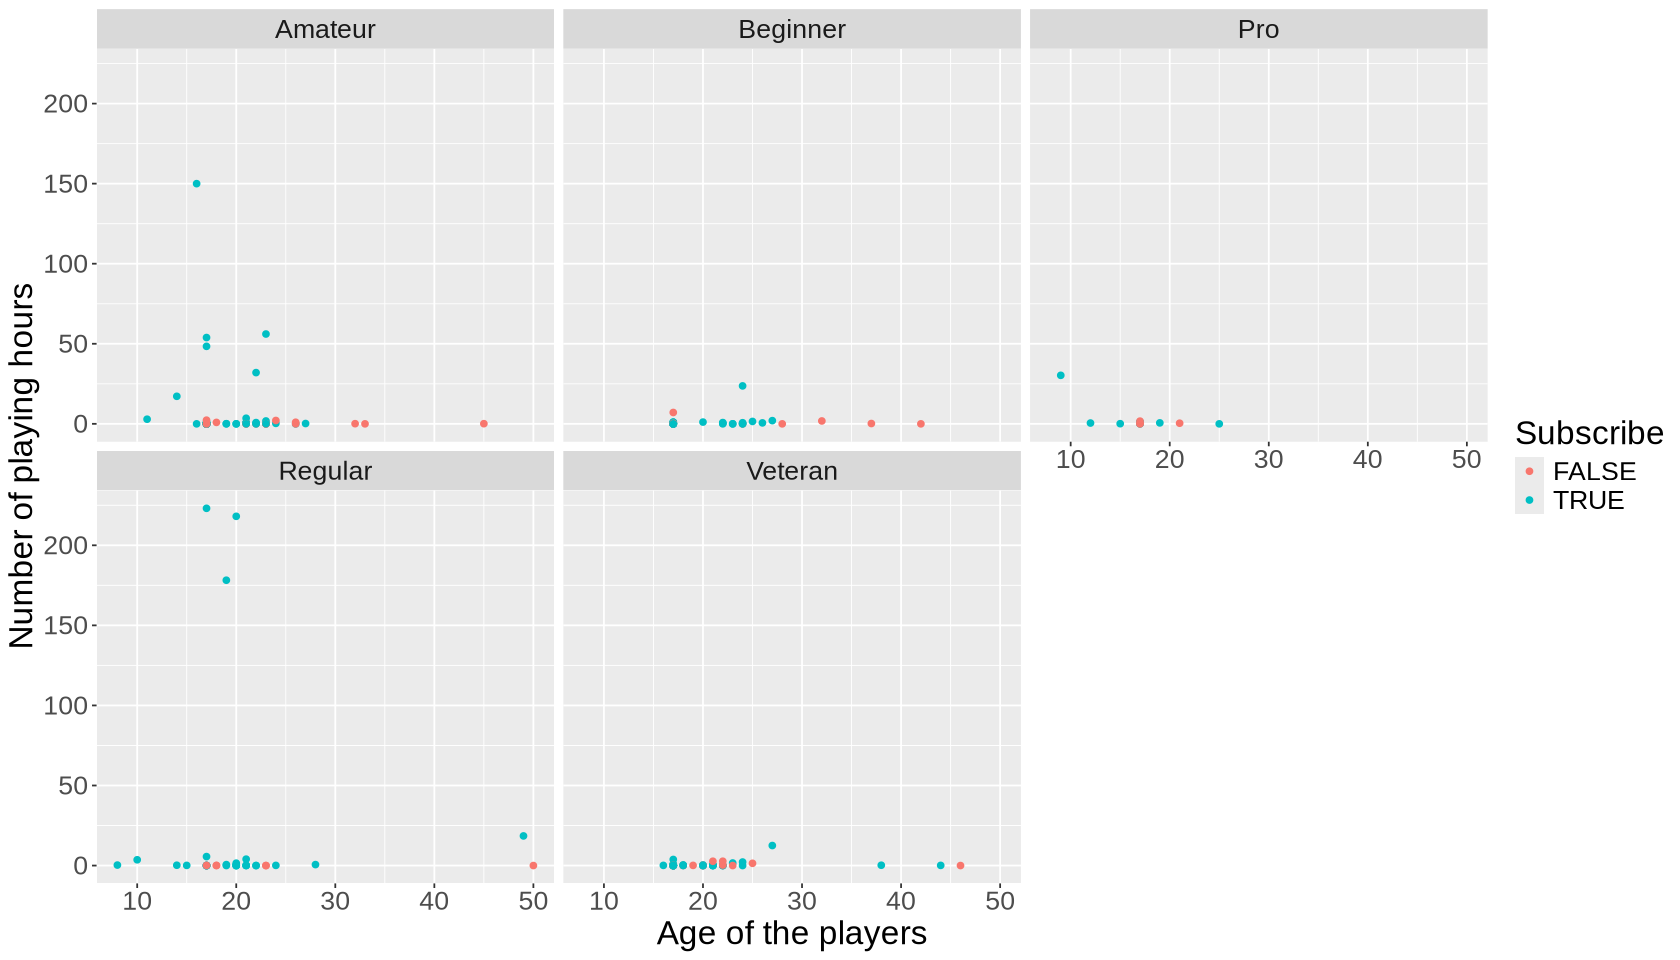

In [56]:
options(repr.plot.height = 8, repr.plot.width = 14)
players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    facet_wrap(~factor(experience)) + 
    labs(x = "Age of the players",
        y = "Number of playing hours",
        color = "Subscribe") +
    theme(text = element_text(size = 20))
    

The Amateur and Regular subscribers have higher number of playing hours. Meanwhile among those whose experience are beginner, pro, and veteran across all ages, they are have subscription status that are not clearly distinguishable by number of playing hours. 